In [1]:
import pandas as pd 

In [134]:
import numpy as np
days = 252
end = 262
df_garch = pd.read_csv("result_garch_daily.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_preaveraging = pd.read_csv("result_garch_preaveraging.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_ito_realized_naive = pd.read_csv("result_garch_ito_realized_naive.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_ito_realized_preaveraging = pd.read_csv("result_garch_ito_realized_preaveraging.csv", index_col=0).iloc[end-days:end].reset_index(drop=True) #* (16400)
df_garch_ito_unified_naive = pd.read_csv("result_garch_ito_unified_naive.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_ito_unified_preaveraging = pd.read_csv("result_garch_ito_unified_preaveraging.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)#* (16400)
dfs = {
    # "garch": df_garch,
    "garch_preaveraging": df_garch_preaveraging,
    # "garch_ito_realized_naive": df_garch_ito_realized_naive,
    "garch_ito_realized_preaveraging": df_garch_ito_realized_preaveraging,
    # "garch_ito_unified_naive": df_garch_ito_unified_naive,
    "garch_ito_unified_preaveraging": df_garch_ito_unified_preaveraging,
}
x_prv = df_garch_ito_unified_preaveraging["vol_real"] #/ np.sqrt(16400)

<Axes: >

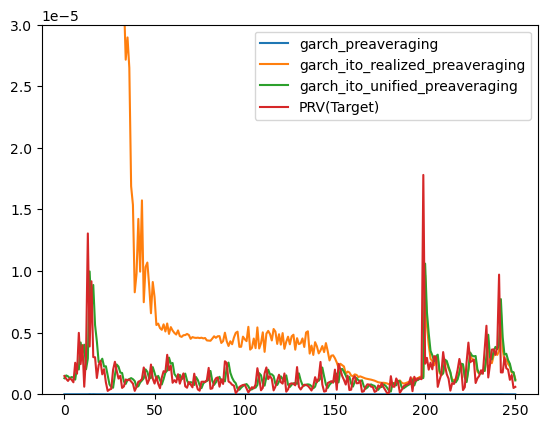

In [146]:
df_est_vols = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_est_vols["PRV(Target)"] = x_prv
df_est_vols.plot(ylim=(0,3e-5))

In [ ]:
df_MSPE = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_MSPE = (df_MSPE).subtract(x_prv, axis=0).pow(2).mean(axis=0)
print(df_MSPE)
df_MSPE.sort_values().plot.barh(title="MSPE error to PRV")

garch_preaveraging                 5.249195e-12
garch_ito_realized_preaveraging    5.254109e-07
garch_ito_unified_preaveraging     3.206284e-12
dtype: float64


<Axes: title={'center': 'MSPE error to PRV'}>

<Axes: >

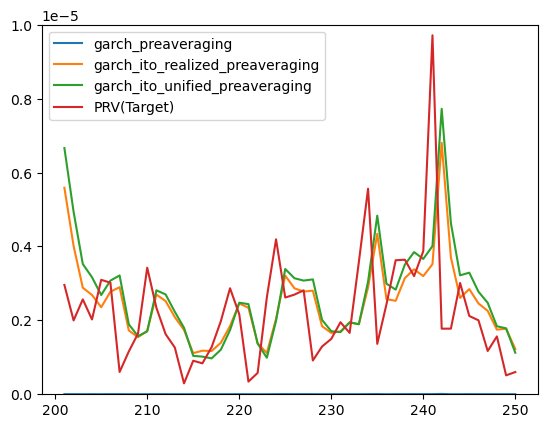

In [139]:
df_est_vols = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_est_vols["PRV(Target)"] = x_prv
df_est_vols.iloc[-50:].plot(ylim=(0,1e-5))

garch_preaveraging                 7.430877e-12
garch_ito_realized_preaveraging    2.683668e-12
garch_ito_unified_preaveraging     3.301745e-12
dtype: float64


<Axes: title={'center': 'MSPE error to PRV'}>

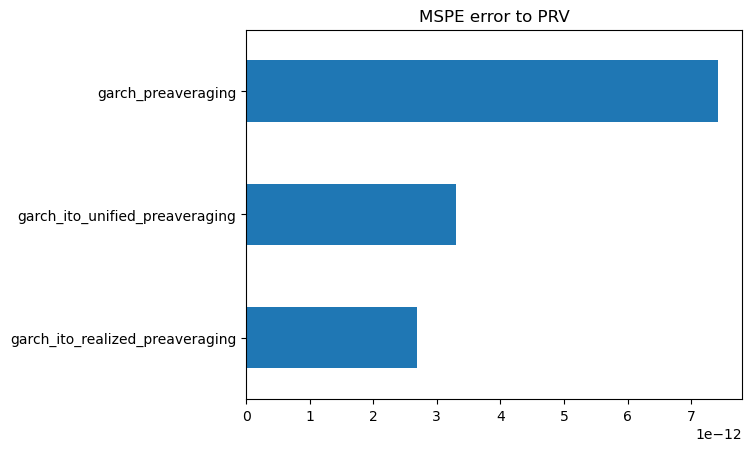

In [145]:
df_MSPE = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_MSPE = (df_MSPE).subtract(x_prv, axis=0).iloc[-50:].pow(2).mean(axis=0)
print(df_MSPE)
df_MSPE.sort_values().plot.barh(title="MSPE error to PRV")

In [120]:
(df_MSPE - x_prv)

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,garch_ito_realized_preaveraging,garch_ito_unified_preaveraging,garch_preaveraging
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
